# Template of  jupyter notebook for analysis of SAXS/WAXS/GiSAXS/GiWAXS

## Load package

In [35]:
%matplotlib notebook
from pyScatt.packages import *
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
T = True
F = False

## Define IO

In [36]:
#inDir =  '/home/group/NSLSII_Data/SMI/2020_Cycle1/AB_CUNNY/AB2_1/'
inDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/raw_data/300KW/'
print('The input dir is: %s'%inDir)



The input dir is: /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/raw_data/300KW/


In [37]:
outDir = '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/'
outDir = create_fullpath(  outDir )

outDir_HDF =  create_dir(  'HDF_Results/', outDir )
outDir_PDF =  create_dir(  'PDF_Report/', outDir )

Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/HDF_Results/  already exists
Directory  /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/PDF_Report/  already exists


In [38]:
 %run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

## Organize Data 
* the sorting method heavly relies on data acquisition strategy
* Currently, there is no general method for sorting

In [39]:
username_ = 'Cell'


flist = ls_dir( inDir, and_list=[  username_,  ], no_list=[ ])
_, flists = sort_fnlist( flist,  cut_beg = -24, cut_end=-9, method = 'cut_from_end' ) #for waxs

flists_clean = drop_xyz_float_filenames( flists, pattern_characters = ['_x', '_y', '_z', '_w' ] )     
Nf = len( flists)
print('There are %s files for user: %s in this run.'%(Nf, username_))

There are 33 files for user: Cell in this run.


In [40]:
#flists_clean

### Using a two-layered dict to sort the files 

In [41]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [42]:
cut_pattern= r'(_waxs)'

sam_dict, sams = get_Unique_SamDict_from_list( flists, sam_list_clean=flists_clean, 
                                               cut_pattern= cut_pattern, starting_point=  0     )   
ks =  sorted(list(sams.keys()))
N = len(ks)
print( 'There are %s samples.'%(N))

There are 3 samples.


In [43]:
ks

['_HB_Cell_1_x29889_y-4640',
 '_HB_Cell_2_x8989_y-4440',
 '_HB_Cell_3_x-12411_y-5940']

In [44]:
ks[0], sam_dict[ks[0]]

('_HB_Cell_1_x29889_y-4640',
 ['_HB_Cell_1_x29888.54_y-4640.23_waxsP00.00_expt5s_attNone_sid00136828_000001_WAXS.tif',
  '_HB_Cell_1_x29888.55_y-4640.22_waxsP06.50_expt5s_attNone_sid00136831_000001_WAXS.tif',
  '_HB_Cell_1_x29888.56_y-4640.22_waxsP13.00_expt5s_attNone_sid00136834_000001_WAXS.tif',
  '_HB_Cell_1_x29888.57_y-4640.22_waxsP19.50_expt5s_attNone_sid00136837_000001_WAXS.tif',
  '_HB_Cell_1_x29888.56_y-4640.23_waxsP26.00_expt5s_attNone_sid00136840_000001_WAXS.tif',
  '_HB_Cell_1_x29888.53_y-4640.22_waxsP32.50_expt5s_attNone_sid00136843_000001_WAXS.tif',
  '_HB_Cell_1_x29888.54_y-4640.22_waxsP39.00_expt5s_attNone_sid00136846_000001_WAXS.tif',
  '_HB_Cell_1_x29888.56_y-4640.23_waxsP45.50_expt5s_attNone_sid00136849_000001_WAXS.tif',
  '_HB_Cell_1_x29888.55_y-4640.22_waxsP52.00_expt5s_attNone_sid00136852_000001_WAXS.tif',
  '_HB_Cell_1_x29888.54_y-4640.22_waxsP58.50_expt5s_attNone_sid00136855_000001_WAXS.tif',
  '_HB_Cell_1_x29888.54_y-4640.22_waxsP65.00_expt5s_attNone_sid00136858

##  Load Mask if has one

In [45]:
#mask  =np.load( '/home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Mask/mask_waxs_2020C3_YG.npy')
#show_img(mask)
mask = None

## Define data analysis parameters and methods

### A GiWAXS

In [46]:
username = 'Dinca'
beamline = 'SMI'
cycle='2020_C3'


#geometry   =  'Reflection'
geometry   =  'Transmission'
det_str =  'Pilatus300kw'

wav_m = 1E-10 * (12.398/16.1)
sdd_mm = 273.9 + 1.4 #for pz = 1400?
b_xy = [98, 1388]  
bs_xy = [98, 1250] 
incident_angle = 0
hotpixel_thres = 1e6
  
pargs_sc = dict( wav_m = wav_m, 
                sdd_mm = sdd_mm, 
                b_xy =b_xy, 
                bs_xy = bs_xy, 
                incident_angle = incident_angle,             
                det_str = det_str, 
                bs_kind = None, 
                useqx = True,
                geometry =  geometry,                
                username = username, 
                cycle =  cycle, 
                beamline = beamline, 
                outDir = outDir, )
              # mask = mask )
    

rot_angle_start = 0
rot_angle_step = 6.5 
         
## Setup the class
SC = SMI_Scattering( pargs_sc  )
#SC.set_rotation_angles( rot_angle  ) 


### Methods

In [47]:
do_plot = T #True 
#do_inpait = True, make it True, the circular average does not use inpaited data 
do_show_plot = T
save_raw = F
do_qimg = F
do_ciravg = F
save_raw= T



if T:    
    ###########################
    #for WAXS
    ###########################  
    do_plot_raw = T # True
    check_stitch = F
    do_stitch = T
    do_Qciravg = T
    show_Qciravg_roi = F
    
    do_Qciravg_sector = F   
    show_Qciravg_sector = F    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [  10,  30,  50, 70, 90    ]    
    
    do_Qqphi = F 
    do_q_qphi = F
    do_p_qphi = F
    

if F:    
    ###########################
    #for GiWAXS
    ###########################  
    do_plot_raw = T # True
    check_stitch = T
    do_stitch = T
    do_Qciravg = T
    show_Qciravg_roi = T 
    
    do_Qciravg_sector = T   
    show_Qciravg_sector = T    
    Qciravg_sector_angle_wid = 10 
    Qciravg_sector_angles = [  10,  30,  50, 70, 90    ]   
    
    do_Qqphi = T 
    do_q_qphi = T
    do_p_qphi = T





    
    
    

In [60]:
sample_list = ks[ :  ]
#sample_list = ks   #use a dummy papemill to run this
print( sample_list )

['_HB_Cell_1_x29889_y-4640', '_HB_Cell_2_x8989_y-4440', '_HB_Cell_3_x-12411_y-5940']


In [49]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/generic_functions.py

In [50]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py

In [58]:
sample_list[0][:10]

'_HB_Cell_1'

# Run the data analysis

The sample is: _HB_Cell_1_x29889_y-4640.
The filelist for this sample is: ['_HB_Cell_1_x29888.54_y-4640.23_waxsP00.00_expt5s_attNone_sid00136828_000001_WAXS.tif', '_HB_Cell_1_x29888.55_y-4640.22_waxsP06.50_expt5s_attNone_sid00136831_000001_WAXS.tif', '_HB_Cell_1_x29888.56_y-4640.22_waxsP13.00_expt5s_attNone_sid00136834_000001_WAXS.tif', '_HB_Cell_1_x29888.57_y-4640.22_waxsP19.50_expt5s_attNone_sid00136837_000001_WAXS.tif', '_HB_Cell_1_x29888.56_y-4640.23_waxsP26.00_expt5s_attNone_sid00136840_000001_WAXS.tif', '_HB_Cell_1_x29888.53_y-4640.22_waxsP32.50_expt5s_attNone_sid00136843_000001_WAXS.tif', '_HB_Cell_1_x29888.54_y-4640.22_waxsP39.00_expt5s_attNone_sid00136846_000001_WAXS.tif', '_HB_Cell_1_x29888.56_y-4640.23_waxsP45.50_expt5s_attNone_sid00136849_000001_WAXS.tif', '_HB_Cell_1_x29888.55_y-4640.22_waxsP52.00_expt5s_attNone_sid00136852_000001_WAXS.tif', '_HB_Cell_1_x29888.54_y-4640.22_waxsP58.50_expt5s_attNone_sid00136855_000001_WAXS.tif', '_HB_Cell_1_x29888.54_y-4640.22_waxsP65.00_ex

<IPython.core.display.Javascript object>


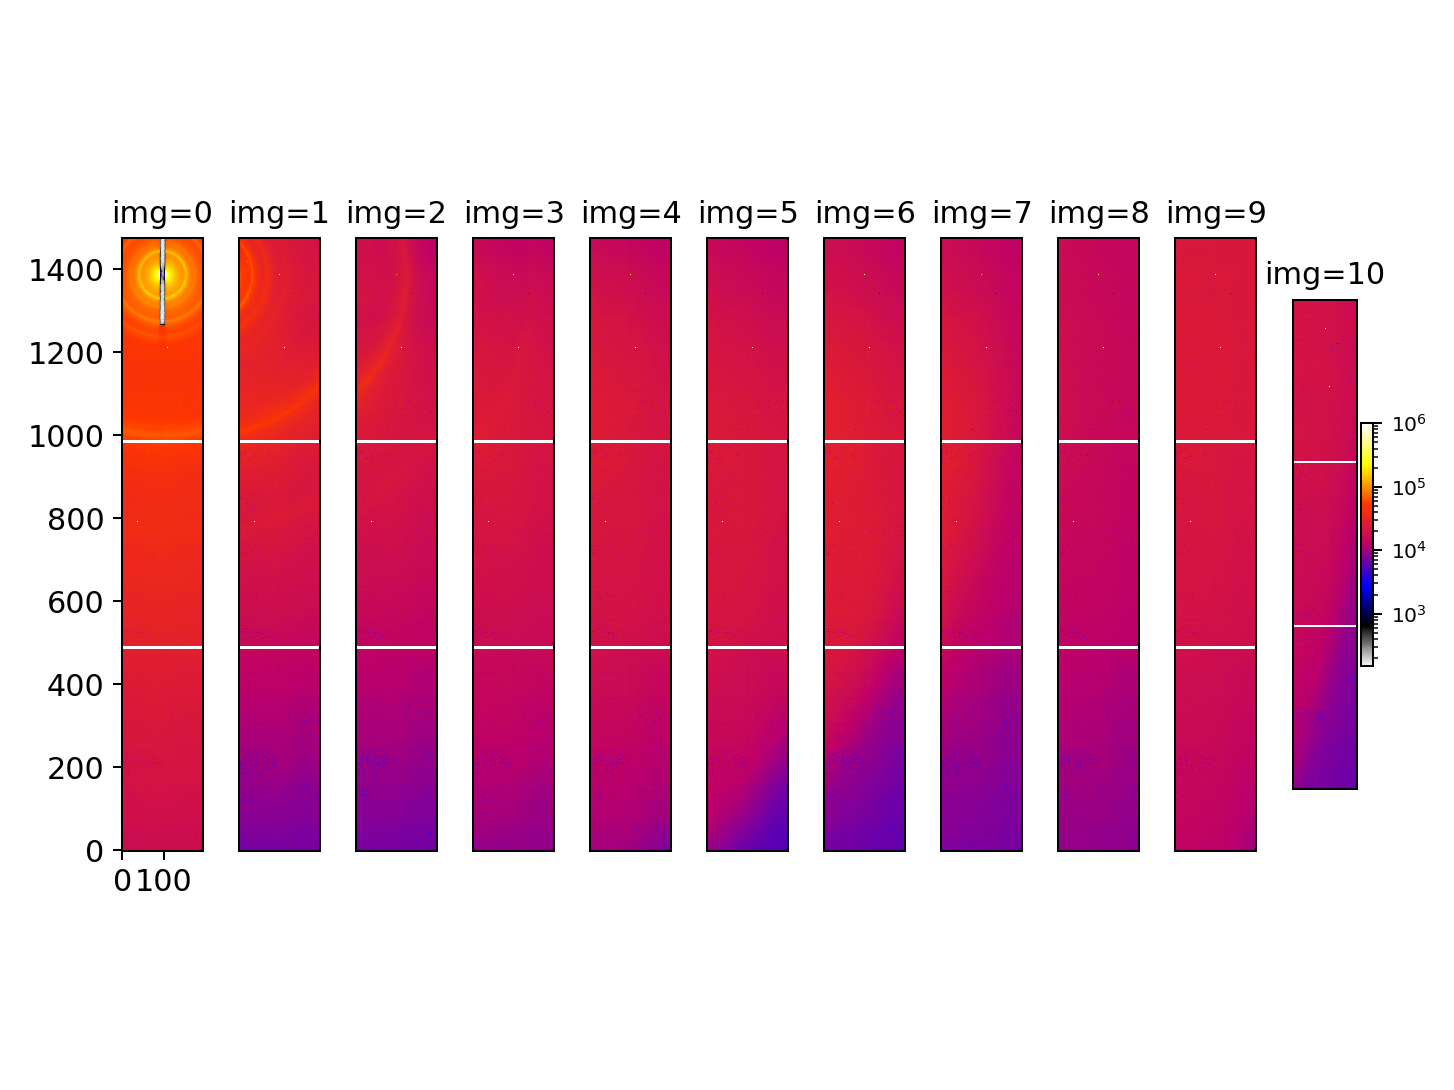

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:1137: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


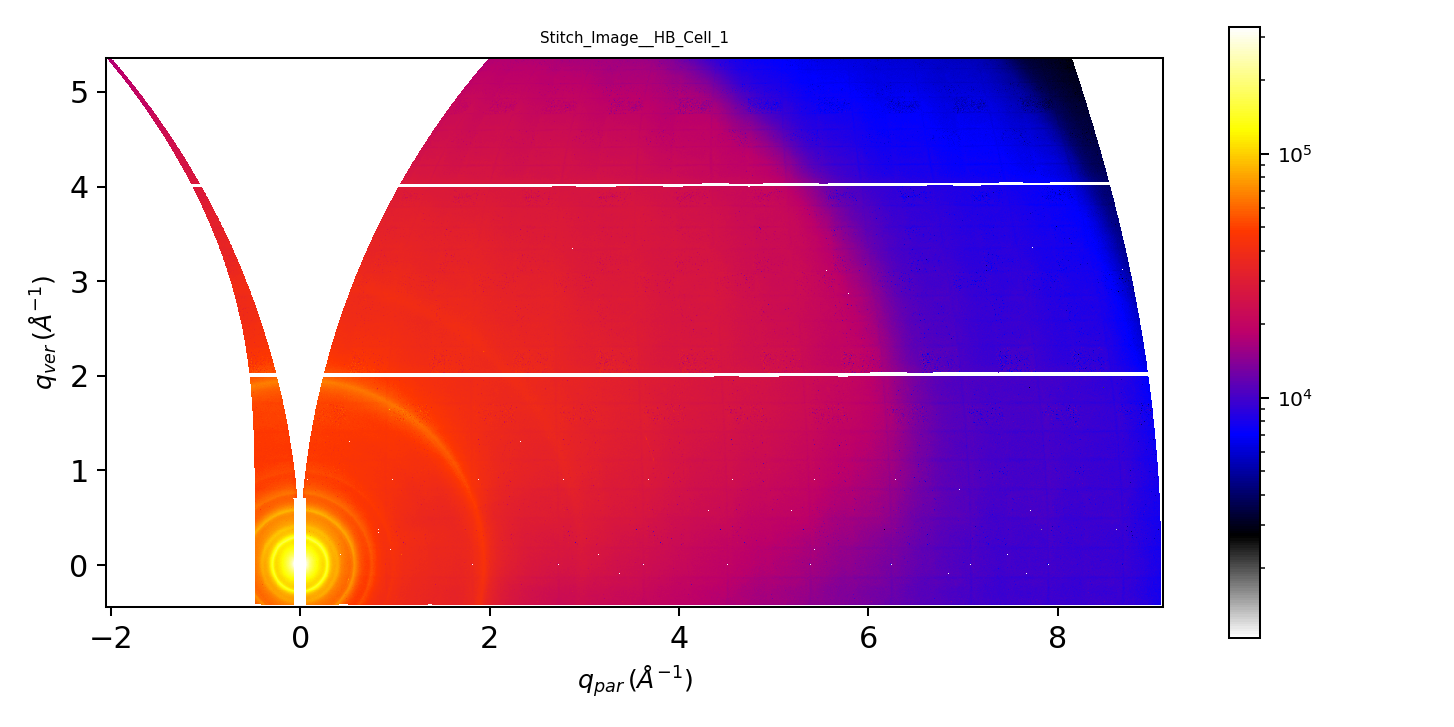

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__HB_Cell_1.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/WAXS/Cir_Avg/


<IPython.core.display.Javascript object>


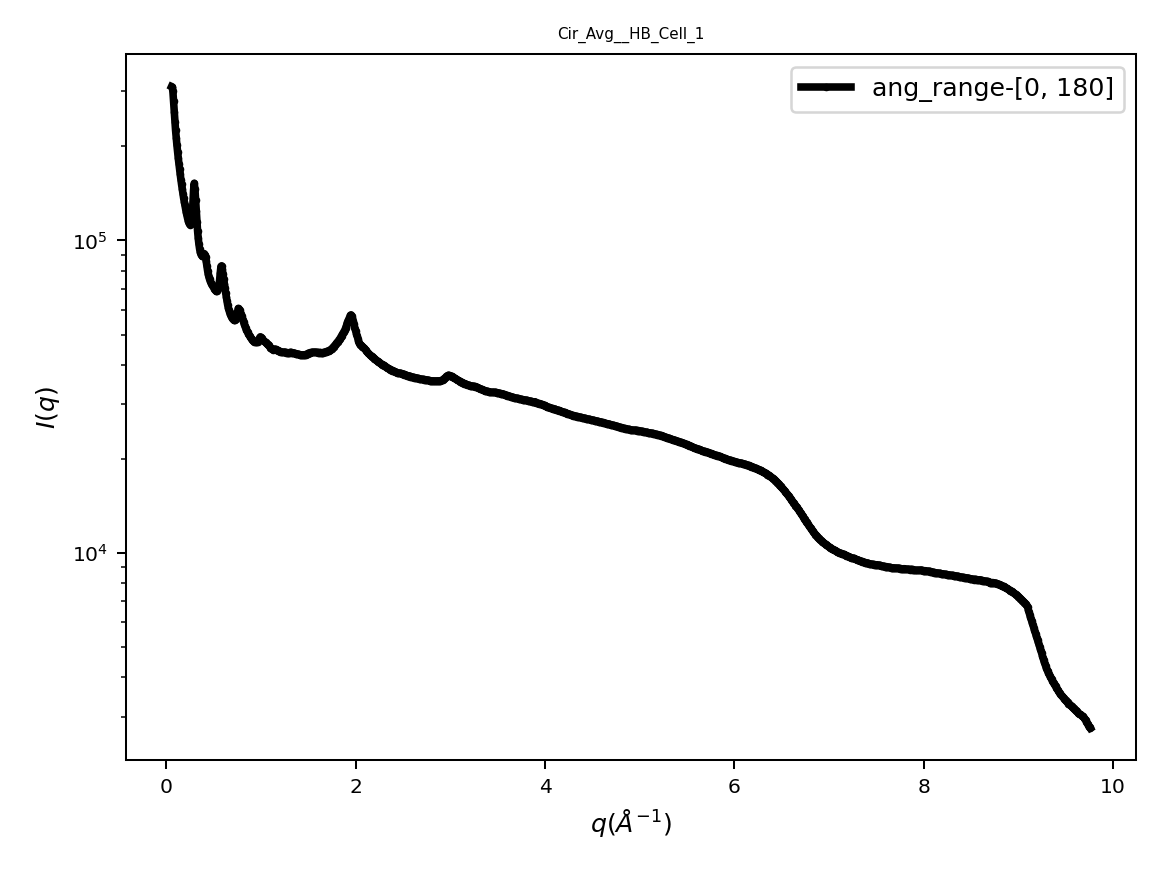

The sample is: _HB_Cell_2_x8989_y-4440.
The filelist for this sample is: ['_HB_Cell_2_x8988.91_y-4440.11_waxsP00.00_expt5s_attNone_sid00136829_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.11_waxsP06.50_expt5s_attNone_sid00136832_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP13.00_expt5s_attNone_sid00136835_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP19.50_expt5s_attNone_sid00136838_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP26.00_expt5s_attNone_sid00136841_000001_WAXS.tif', '_HB_Cell_2_x8988.92_y-4440.1_waxsP32.50_expt5s_attNone_sid00136844_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP39.00_expt5s_attNone_sid00136847_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP45.50_expt5s_attNone_sid00136850_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP52.00_expt5s_attNone_sid00136853_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.1_waxsP58.50_expt5s_attNone_sid00136856_000001_WAXS.tif', '_HB_Cell_2_x8988.91_y-4440.11_waxsP65.00_expt5s_attNone_sid0013

<IPython.core.display.Javascript object>


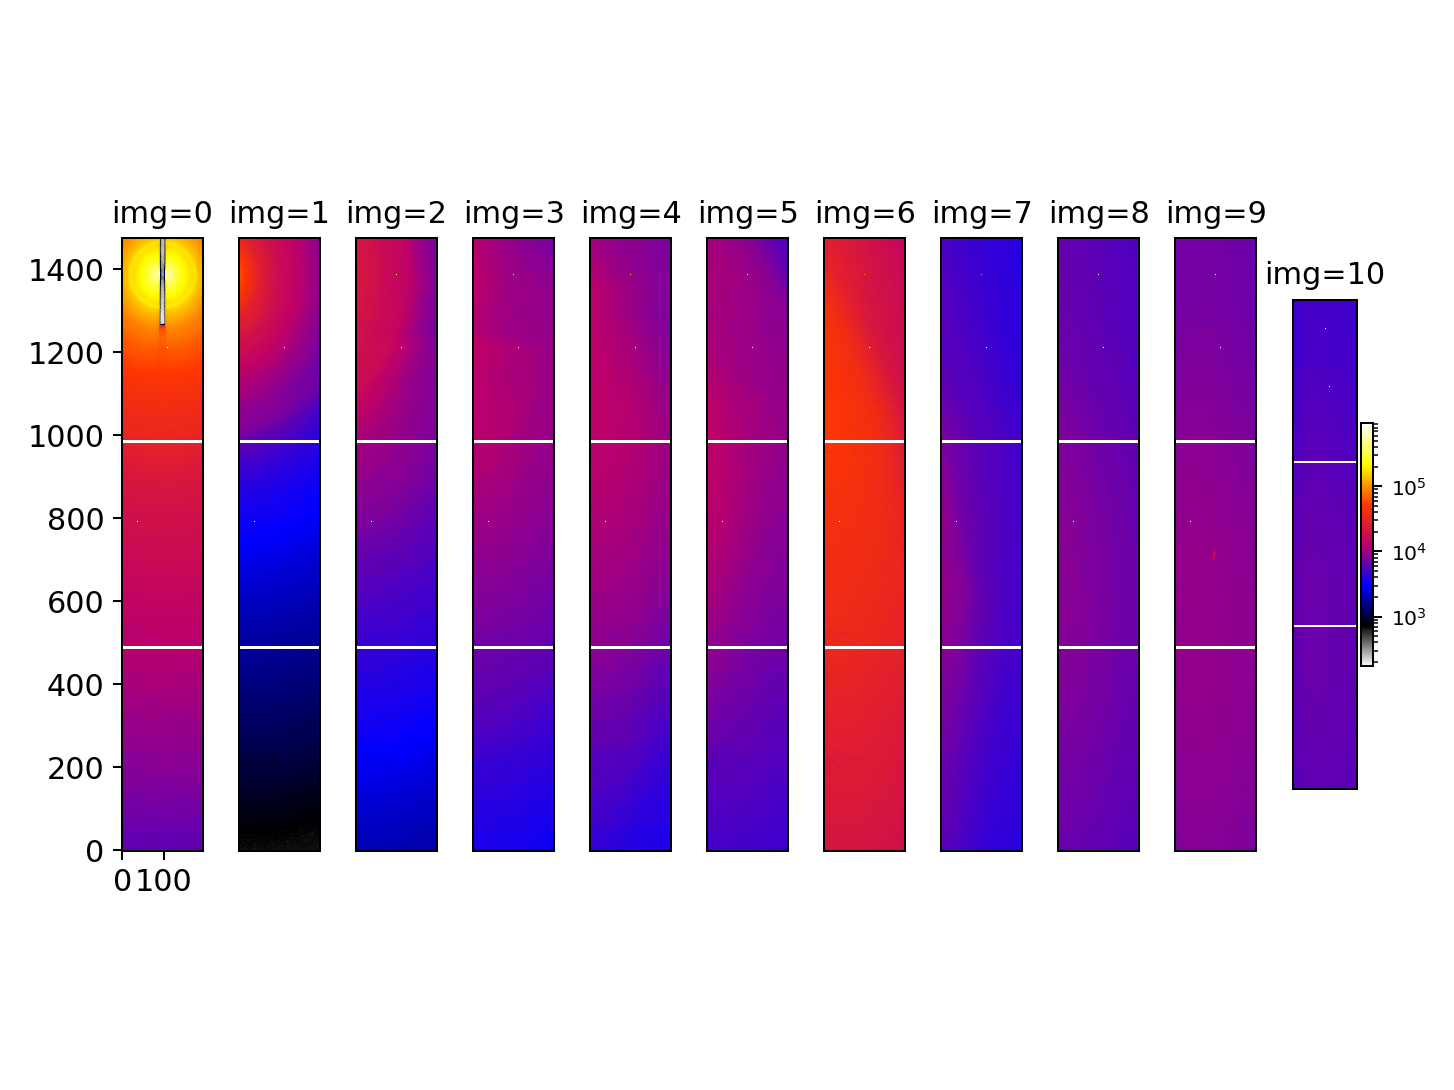

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:1137: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


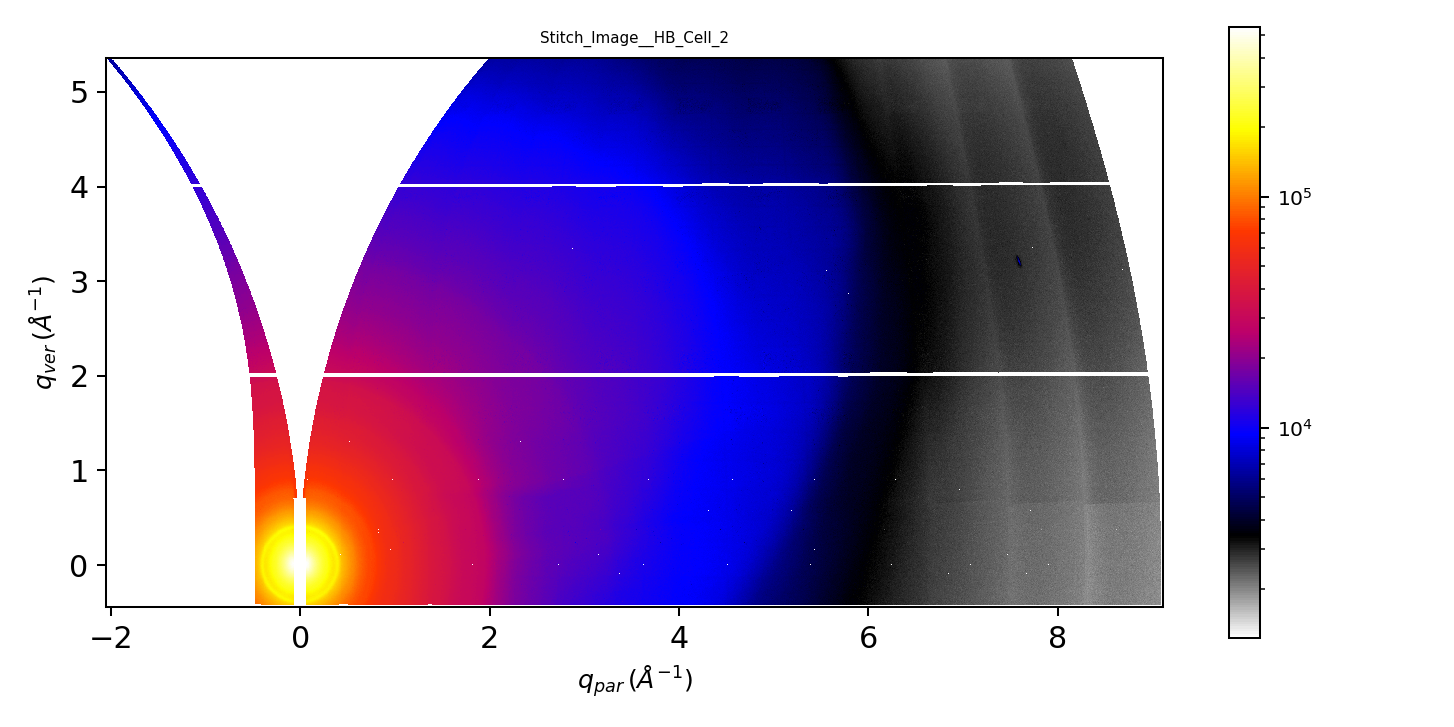

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__HB_Cell_2.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/WAXS/Cir_Avg/


<IPython.core.display.Javascript object>


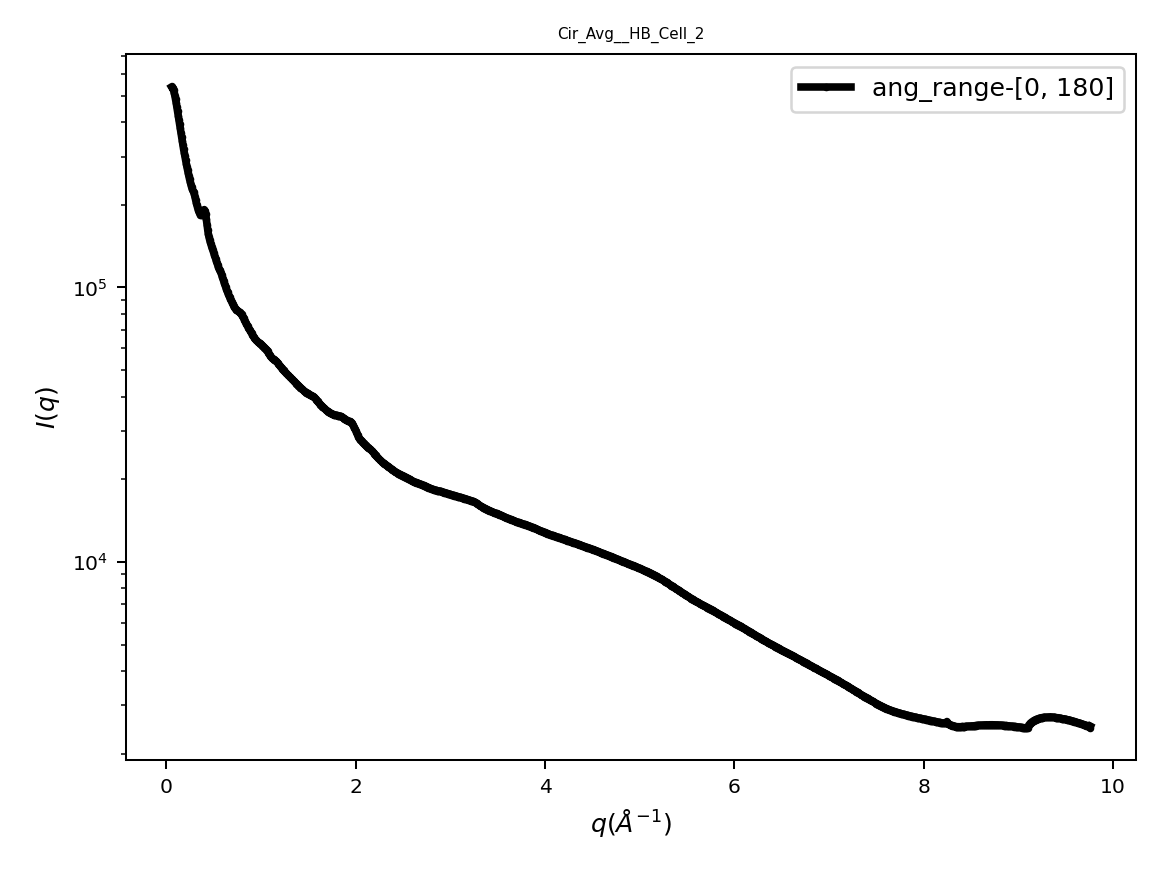

The sample is: _HB_Cell_3_x-12411_y-5940.
The filelist for this sample is: ['_HB_Cell_3_x-12411.09_y-5939.8_waxsP00.00_expt5s_attNone_sid00136830_000001_WAXS.tif', '_HB_Cell_3_x-12411.36_y-5939.8_waxsP06.50_expt5s_attNone_sid00136833_000001_WAXS.tif', '_HB_Cell_3_x-12411.47_y-5939.8_waxsP13.00_expt5s_attNone_sid00136836_000001_WAXS.tif', '_HB_Cell_3_x-12411.38_y-5939.8_waxsP19.50_expt5s_attNone_sid00136839_000001_WAXS.tif', '_HB_Cell_3_x-12411.45_y-5939.8_waxsP26.00_expt5s_attNone_sid00136842_000001_WAXS.tif', '_HB_Cell_3_x-12411.08_y-5939.8_waxsP32.50_expt5s_attNone_sid00136845_000001_WAXS.tif', '_HB_Cell_3_x-12411.09_y-5939.8_waxsP39.00_expt5s_attNone_sid00136848_000001_WAXS.tif', '_HB_Cell_3_x-12411.09_y-5939.8_waxsP45.50_expt5s_attNone_sid00136851_000001_WAXS.tif', '_HB_Cell_3_x-12411.09_y-5939.8_waxsP52.00_expt5s_attNone_sid00136854_000001_WAXS.tif', '_HB_Cell_3_x-12411.09_y-5939.8_waxsP58.50_expt5s_attNone_sid00136857_000001_WAXS.tif', '_HB_Cell_3_x-12411.39_y-5939.8_waxsP65.00_e

<IPython.core.display.Javascript object>


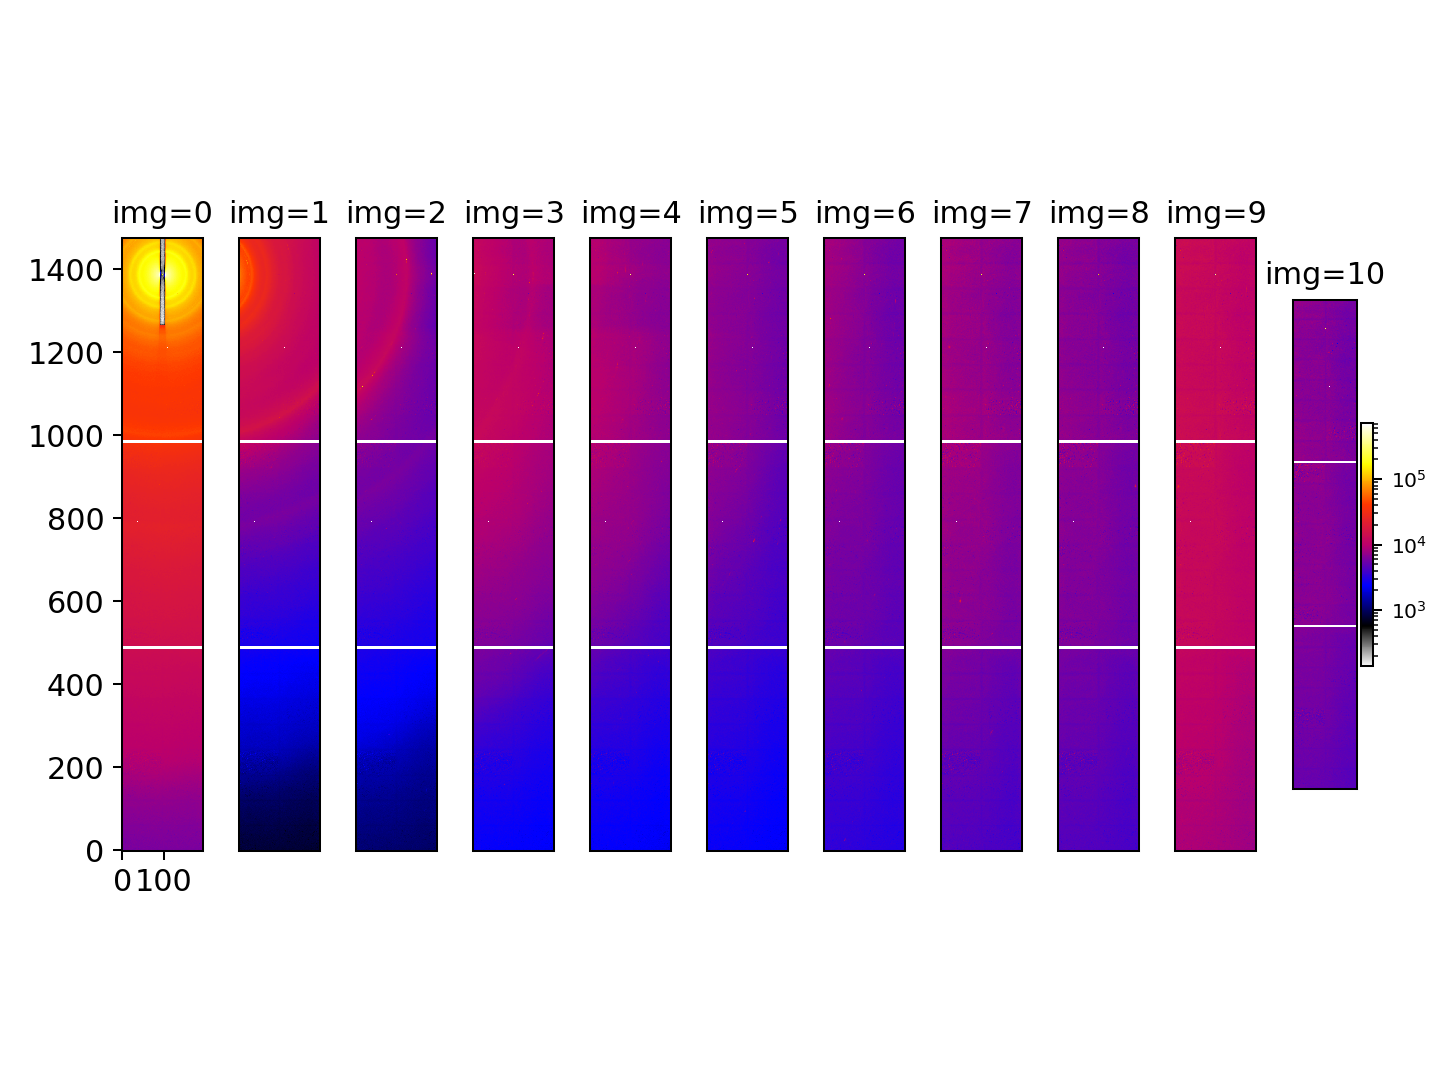

/home/group/Software/pyScatt/pyScatt/Scattering_Functions.py:1137: RuntimeWarning: invalid value encountered in true_divide
  Intensity_map = np.nan_to_num( Intensity_map/count_map )


<IPython.core.display.Javascript object>


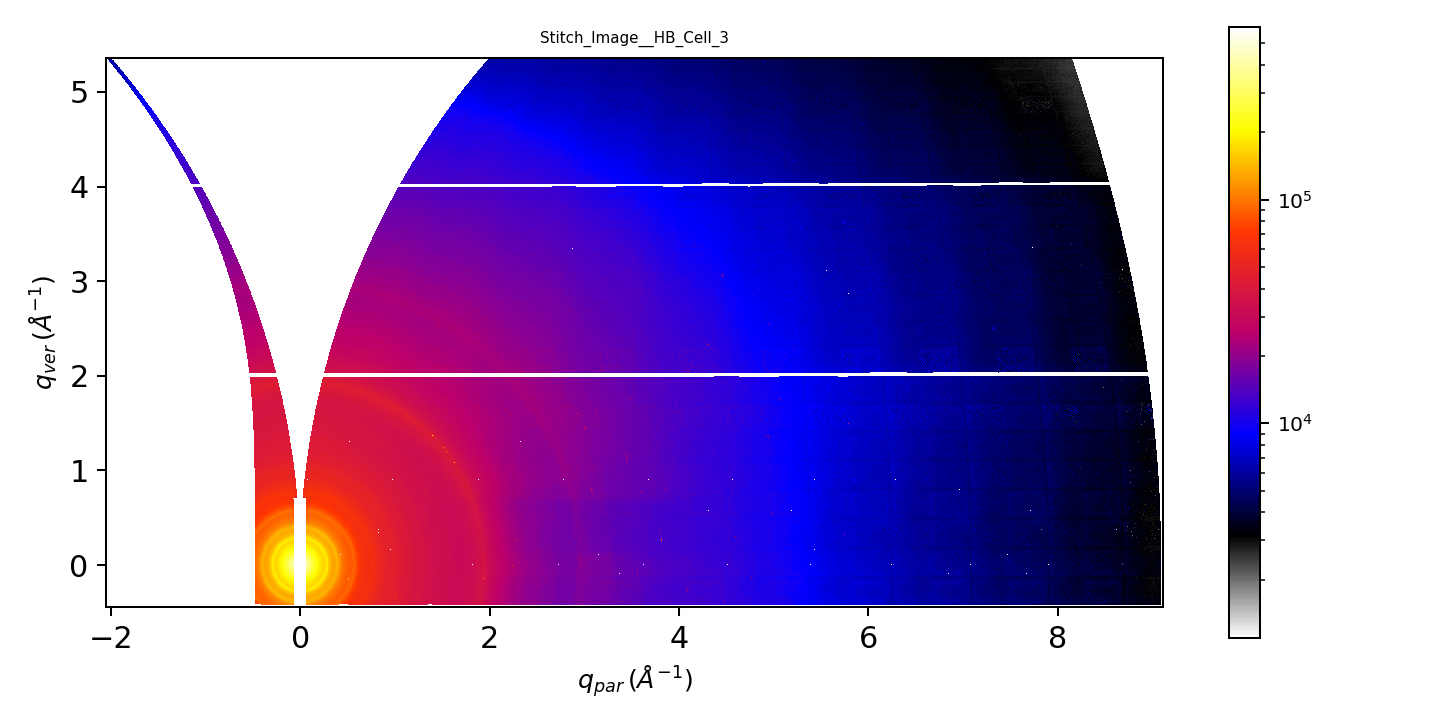

/home/group/Software/pyScatt/pyScatt/plots.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes.append( fig.add_subplot(H,V,i+1)    )


The file: Cir_Avg__HB_Cell_3.csv is saved in /home/yuzhang/NSLSII_Data_Link/SMI/2020_Cycle3/308052_Zhang/Results/Dinca/WAXS/Cir_Avg/


<IPython.core.display.Javascript object>


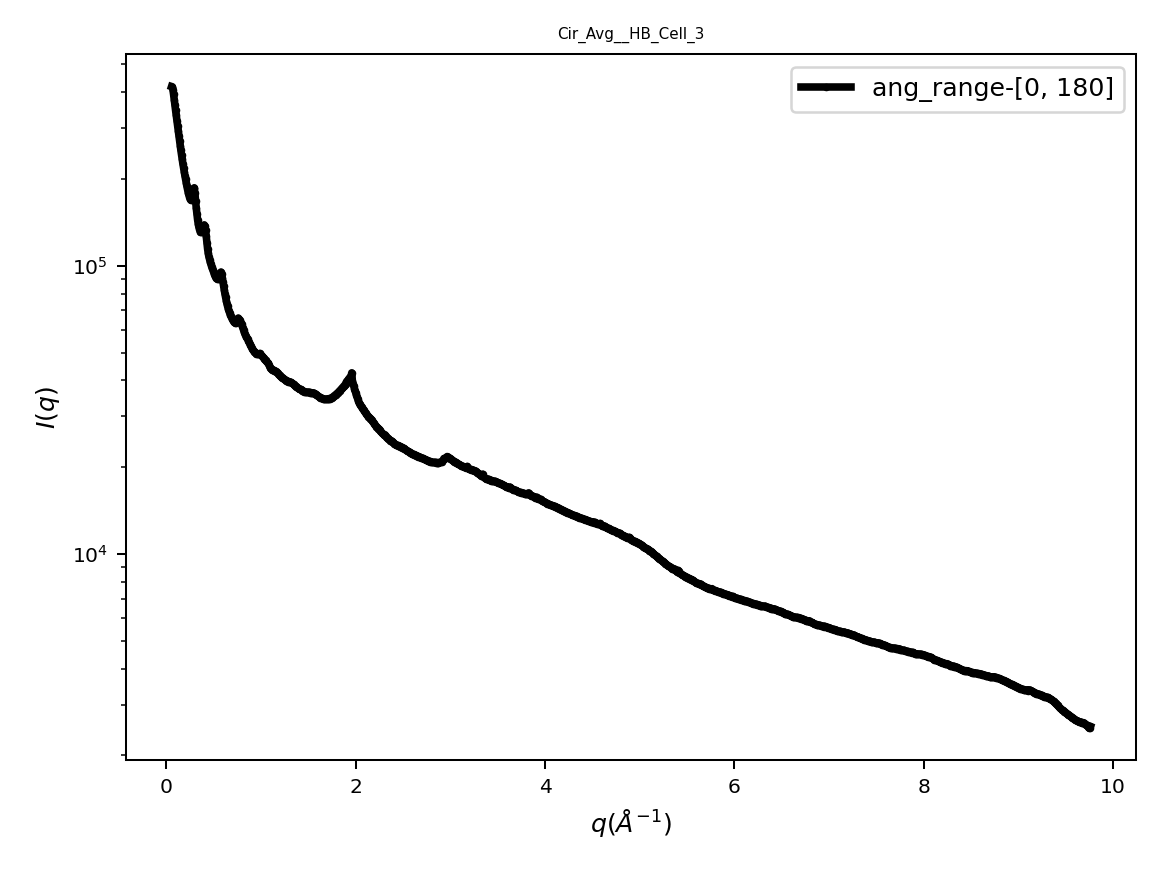

Done


In [61]:
#loop samples
for sam in sample_list:     
    print( 'The sample is: %s.'%sam)    
    fps = sam_dict[sam] [:]
    ##############################################
    ##################A special case##############
    ##############################################
    sam = sam[:10]
    print( 'The filelist for this sample is: %s.'%fps)  
    full_filenames = [ inDir +  fp for fp in fps   ] 
    N =  len(full_filenames)        
    RES = {}
    if det_str ==  'Pilatus300kw': #for WAXS
        PATH = 'WAXS'
        rot_angle = - np.arange( rot_angle_start,  rot_angle_step * N,  rot_angle_step )
        print('The rotation angles are: %s.'%rot_angle)
        pargs_sc['rotation_angles'] = rot_angle
    else:
        PATH = 'SAXS'
    pargs_sc['outDir'] = create_fullpath( outDir + PATH + '/')    
    if geometry  ==  'Reflection':  #for Gi-XS
        p0 = re.search( r'([d][e][g])', sam  ).span()[0]        
        inc = float( sam[ p0-6:p0] )
        print('The incident angle is: %s.'%inc)
        pargs_sc['incident_angle'] = inc 
        
    try:
        pz = float( re.search(   r'(_z)(.*)()', sam ).group()[2:]  )
    except:
        pz = 1400
    pargs_sc['sdd_mm'] = sdd_mm  - pz/1000.         
    SC = SMI_Scattering( pargs_sc  ) 
    SC.md['sample'] = sam
    SC.load_data( full_filenames )   
    SC.saved_plots, SC.saved_data  = {}, {}    
    #######################################
    #plot the raw data
    ########################################
    if do_plot_raw:
        run_plot_raw( SC,  vmin= None, vmax=None,mask=None, fontsize=6, )        
    #######################################
    #Stitch WAXS data
    ########################################    
    SC.offset_y   =   - round( ( pz - 4250.0)/172.0,2 ) 
    if check_stitch:        
        q_ch, iq_ch, int_dict_ch, qx_dict_ch, qz_dict_ch = SC.check_stitich( offset_y = SC.offset_y )  
        peaks = None 
        run_plot_waxs_check_stitch( SC, peaks =peaks,xlim= None, ylim=None,fontsize=6, ) 
    if do_stitch:        
        dq_mag = 5        
        qimg_st, msk_st, qx_st, qz_st, sca_st = SC.stitich( dq_mag = dq_mag, offset_y= SC.offset_y, flag_scale= T ) 
        run_save_stitched_qimage( SC  )         
        run_plot_stitched_qimage( SC  )             
    #######################################
    #Do circular average
    ########################################  
    if do_Qciravg: 
        #qz_roi_range= [ 0.05,  qz_st.max() ] 
        qz_roi_range= None
        qmaskn, q_ca,iq_ca,mask_ca = run_qciravg_st( SC, ciravg_bins=1500, Prange= [0,180], Qrange= None,
                                  qx_roi_range=None,qz_roi_range=qz_roi_range    )
        run_save_qciravg(  SC  )  
        peaks = None 
        run_plot_qciravg( SC, peaks = peaks,xlim= None, ylim=None,fontsize=6, )  
        if show_Qciravg_roi:
            run_plot_qciravg_roi( SC,img_roi=SC.qimg_st*qmaskn,vmin=None,vmax=None,fontsize=6,)        
        
    #######################################
    #Do sector circular average
    ########################################  
    if do_Qciravg_sector:  
        Prange =   [ [w-Qciravg_sector_angle_wid, w+Qciravg_sector_angle_wid] for w in  Qciravg_sector_angles  ]
        qiqs_cas,  qmask_cas = SC.qimg_circular_average_sector(qimg_st , qx_st, qz_st,
                                    Qrange=None,Prange=Prange,bins=1500,mask= qmaskn ) 
        run_save_qciravg_sector( SC  )
        run_plot_qciravg_sector( SC, xlim=[0,8], )#ylim=[.1, 1e5]  )        
        if show_Qciravg_sector:
            run_plot_qciravg_sector_roi( SC  )    
            
    #######################################
    #Do q-phi analysis
    ########################################              
    if do_Qqphi:  
        qphi_bins = [ 500, 180 ];Prange= None;Qrange=None;            
        q_QP, phi_QP, qphi_QP, qphi_mask = SC.qimg_to_qphi(SC.qimg_st, SC.qx_st, SC.qz_st,
                                                  Qrange=Qrange,Prange=Prange,                                                      
                                                  bins=qphi_bins,mask=SC.qmask_st) 
        if do_q_qphi:
            q_QPq,  iq_QPq = SC.qphi_to_iq( qphi_QP, q_range=q_QP, p_range=phi_QP, )
            run_plot_q_iq_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )
        if do_p_qphi:  
            q_range_roi = None 
            q_range_roi = [ 2.94-.05, 2.94 + .05 ]
            p_QPp,  ip_QPp = SC.qphi_to_ip( qphi_QP, q_range=q_QP, p_range=phi_QP, Qrange=q_range_roi ) 
            run_plot_p_ip_qphi( SC, peaks = None, xlim= None, ylim=None,fontsize=6, )
        run_plot_Qqphi( SC,  fontsize=6, vmin= None, vmax=None, aspect= 0.015, )
                    
   ## save data to h5 file 
    res = SC.res_to_dict( save_raw=save_raw, do_stitch=do_stitch, 
                 do_ciravg = do_Qciravg, do_ciravg_sector = do_Qciravg_sector,
                 do_qimg=do_qimg, do_qphi = do_Qqphi,  
                do_q_qphi = do_q_qphi, do_p_qphi = do_p_qphi,                         
                        )                        
 
    K='md';res[K] = {};res[K].update( SC.md   )     
    K='saved_data';res[K] = {};res[K].update( SC.saved_data   )     
    K='saved_plots';res[K] = {};res[K].update( SC.saved_plots   ) 
    
    dicttoh5( res, os.path.join(outDir_HDF, '%s.h5'%sam),
                     h5path='/%s/'%PATH, mode='a', overwrite_data=True)   
    
    
print('Done')       

            

In [52]:
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering_Functions.py
%run -i /home/yuzhang/Software/pyScatt/pyScatt/Scattering.py

# THE END